## Work on removing the weeday trend from the data<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("data-kDl1L.csv",parse_dates=True)

In [3]:
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

In [4]:
df.set_index("Date",inplace=True)

In [5]:
df_freq = df.asfreq('D')

In [6]:
df_freq.index

DatetimeIndex(['2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15',
               ...
               '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
               '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
               '2020-10-11', '2020-10-12'],
              dtype='datetime64[ns]', name='Date', length=221, freq='D')

In [7]:
df.index

DatetimeIndex(['2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15',
               ...
               '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
               '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
               '2020-10-11', '2020-10-12'],
              dtype='datetime64[ns]', name='Date', length=221, freq=None)

In [8]:
df_diff = df_freq["Oahu"].diff()

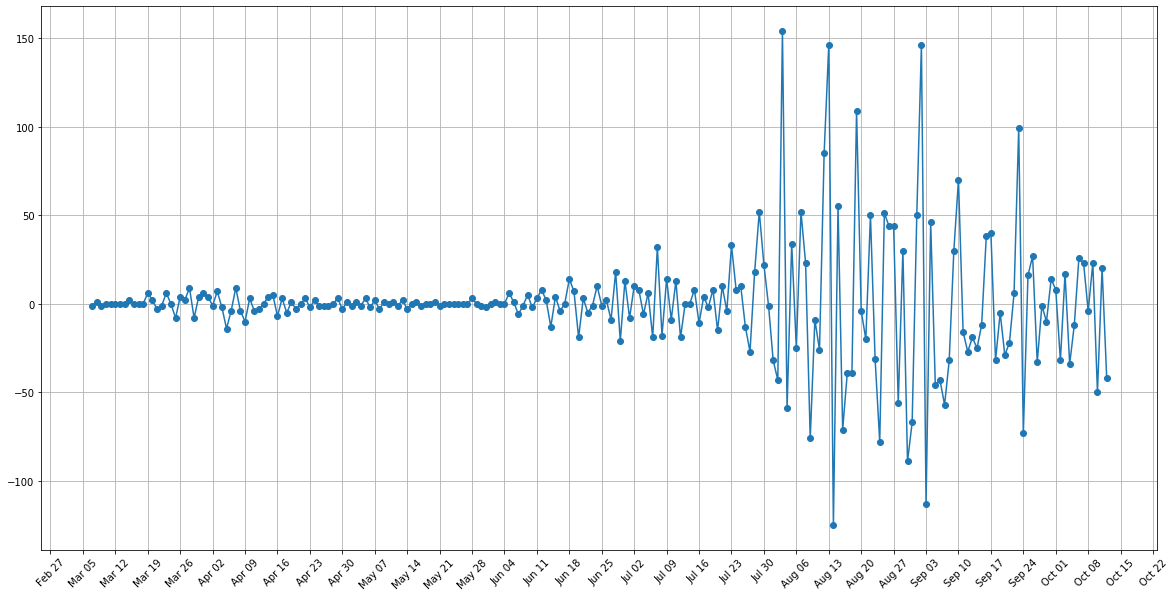

In [9]:
#plot data
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_diff.index, df_diff,marker='o')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)
#grid
ax.grid();


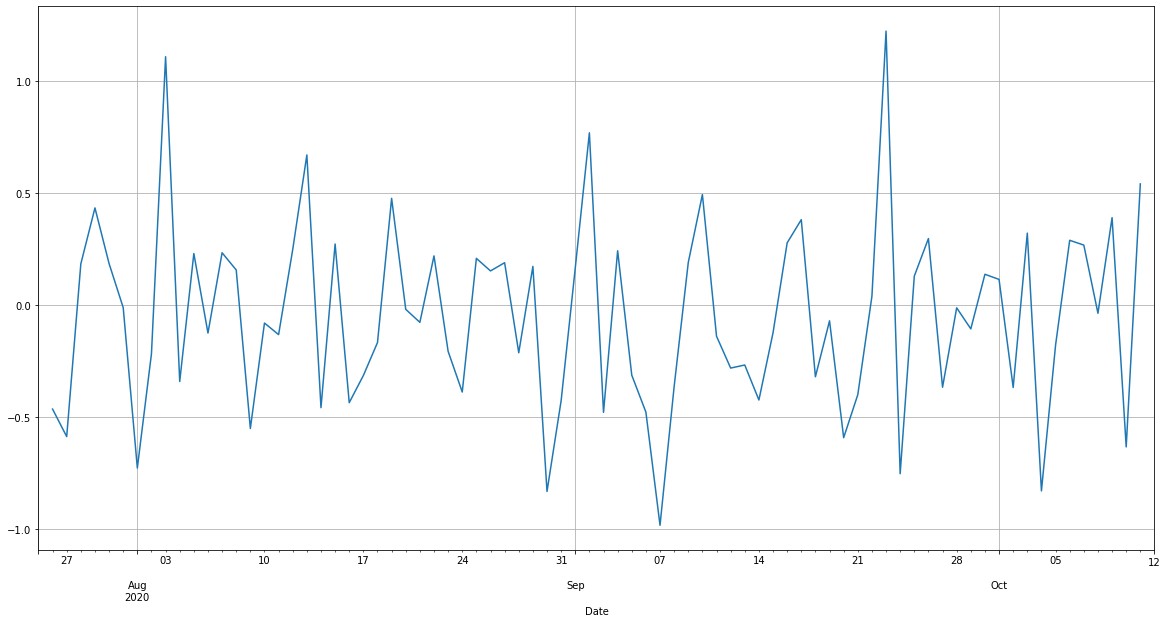

In [10]:
(df_freq[-80:]["Oahu"].diff() / df_freq[-80:]["Oahu"].shift(-1)).plot(figsize=(20,10),grid='on')

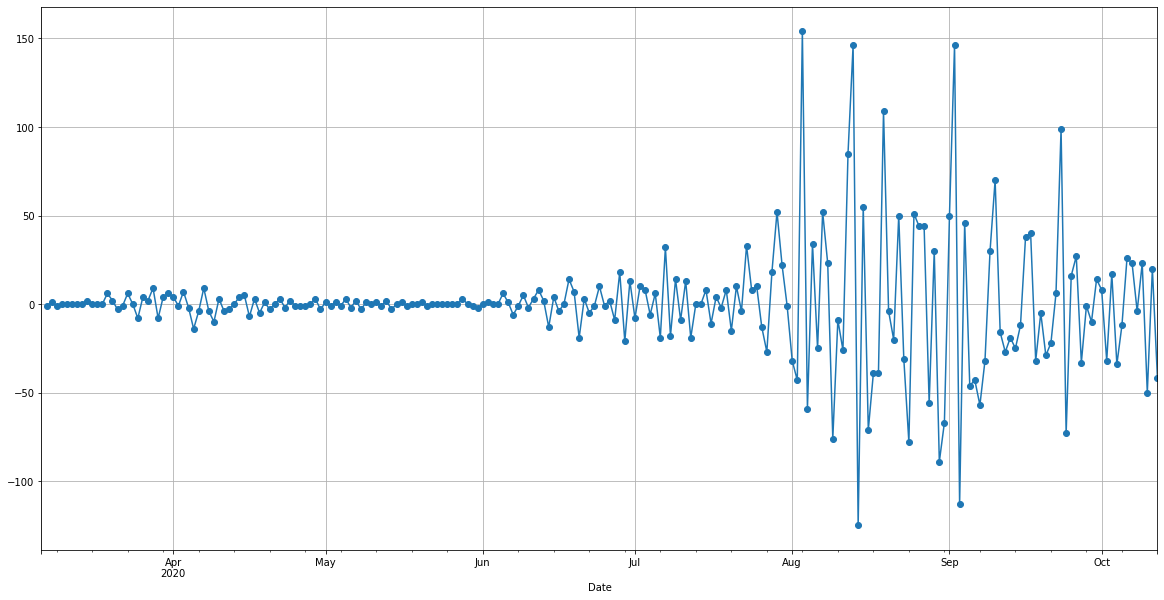

In [11]:
df_freq["Oahu"].diff(1).plot(figsize=(20,10),grid='on',marker='o')

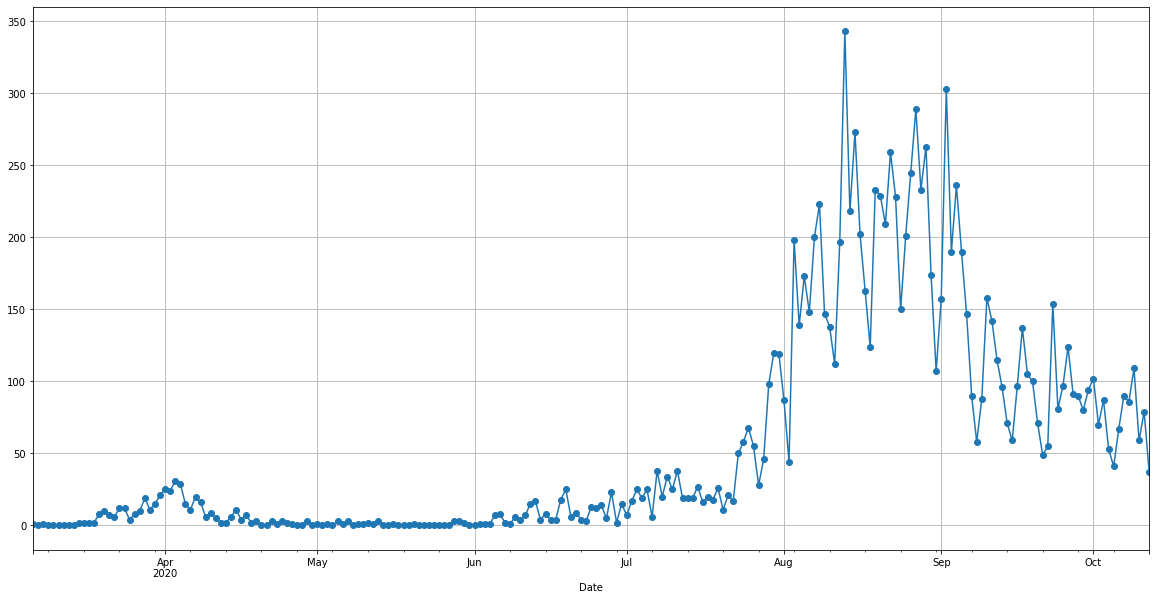

In [12]:
df_freq["Oahu"].plot(figsize=(20,10),grid='on',marker='o')

In [13]:
df_diff.describe()

count    220.000000
mean       0.163636
std       33.166393
min     -125.000000
25%       -7.250000
50%        0.000000
75%        6.000000
max      154.000000
Name: Oahu, dtype: float64

## Do the same thing but use pct diff from 2 week mean

Note that [["Oahu"]] makes the output have a column name, ["Oahu"] gives the table without a column name

In [14]:
dfOahu = df_freq[["Oahu"]]

In [15]:
dfOahu.diff()

,Oahu
Date,
2020-03-06,NaN
2020-03-07,-1.0
2020-03-08,1.0
2020-03-09,-1.0
2020-03-10,0.0
...,...
2020-10-08,-4.0
2020-10-09,23.0
2020-10-10,-50.0


In [16]:
dfOahu["weekly_mean"] = dfOahu["Oahu"].rolling(window=7,center=True).mean()

/home/tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
dfOahu.diff()

,Oahu,weekly_mean
Date,,
2020-03-06,NaN,NaN
2020-03-07,-1.0,NaN
2020-03-08,1.0,NaN
2020-03-09,-1.0,NaN
2020-03-10,0.0,-0.142857
...,...,...
2020-10-08,-4.0,3.714286
2020-10-09,23.0,-0.571429
2020-10-10,-50.0,NaN


In [18]:
dfOahu["pct_diff"]=(dfOahu["Oahu"]/dfOahu["weekly_mean"])

/home/tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


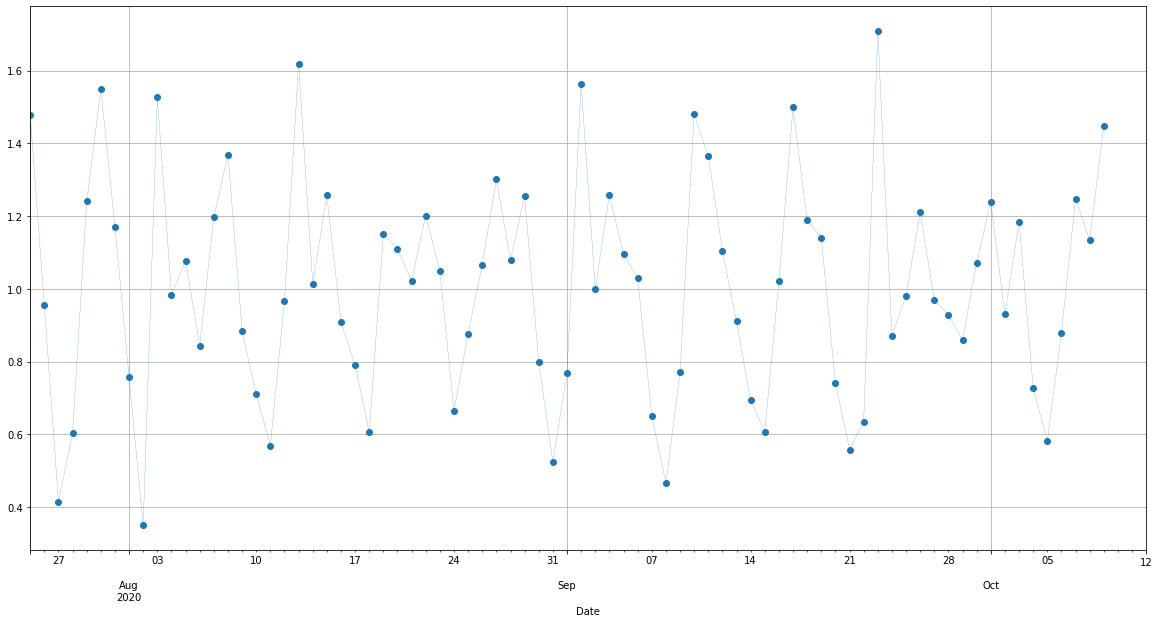

In [19]:
dfOahu["pct_diff"].tail(80).plot(figsize=(20,10), marker='o', linewidth=0.2,grid='on');

In [20]:
dfOahu.loc[:,'weekday'] = dfOahu.index.weekday

/home/tom/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/tom/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
dfWeekDay = dfOahu.groupby('weekday').mean()
dfWeekDay.index =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

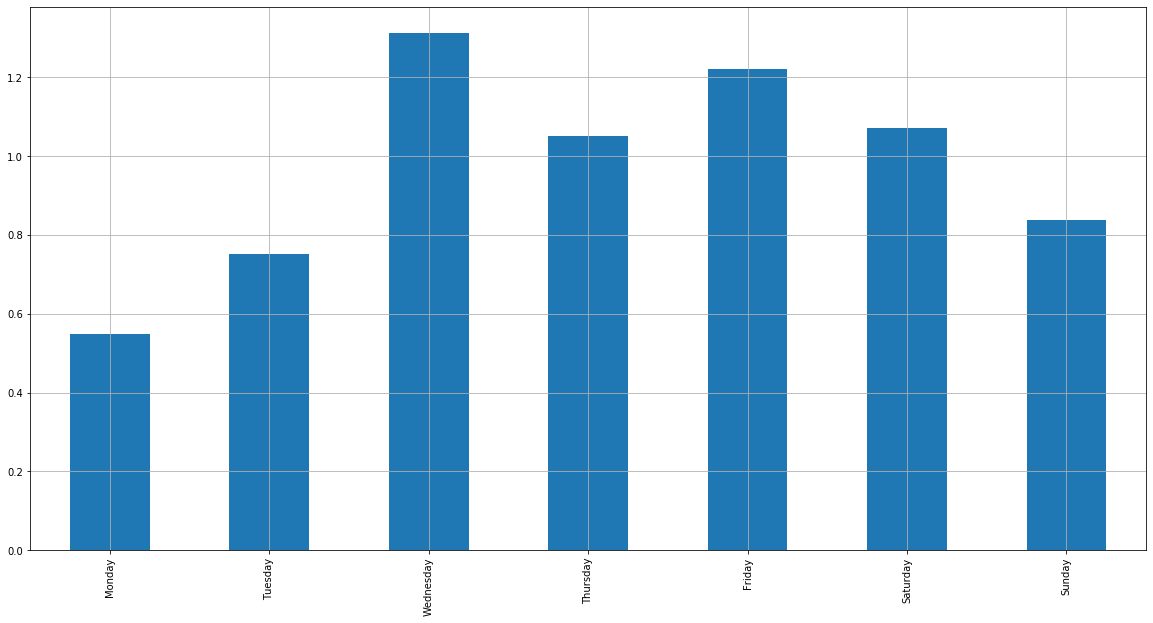

In [22]:
dfWeekDay['pct_diff'].plot(kind='bar',figsize=(20,10),grid='on')

In [23]:
dfWeekDay['pct_diff']

Monday       0.548084
Tuesday      0.752119
Wednesday    1.313068
Thursday     1.049521
Friday       1.220173
Saturday     1.069885
Sunday       0.837993
Name: pct_diff, dtype: float64

How to remove trend from time series?

We can remove the trend by using a method known as differencing. It essentially means creating a new time series wherein
value at time (t)= original value at time (t) - original value at time (t-1)

    Differencing is super helpful in turning your time series into a stationary time series.

Python code for differencing

To create first-order differencing of time series:

# creating the first order differencing data
data_first_order_diff = data[data_columns].diff()

Image for post
Image for post
Image for post
Image for post
Left: Original dataset; Right: Difference detrended version of the dataset

On left, we have the original dataset, and on right, we have the difference detrended version. Looking at the consumption column, we can see the value in 2006–01–02 has now changed from 1380.521 to 311.337, which was obtained by subtracting consumption values in 2006–01–02 and 2006–01–01 (1380.521–1069.184 = 311.337).

In general, what the differenced time series tells us is not the actual value at that particular point in time, but how much different it is from the value in the preceding point in time. That means when we plot this differenced time series, most of these values will lie on either side of the x-axis (or y=0).

## upsample and smooth?

In [24]:
df_hr = df_freq[['Oahu']].resample('H').asfreq()
#df_hr.tail(48)

In [25]:
df_hr.interpolate(method='quadratic', inplace=True)

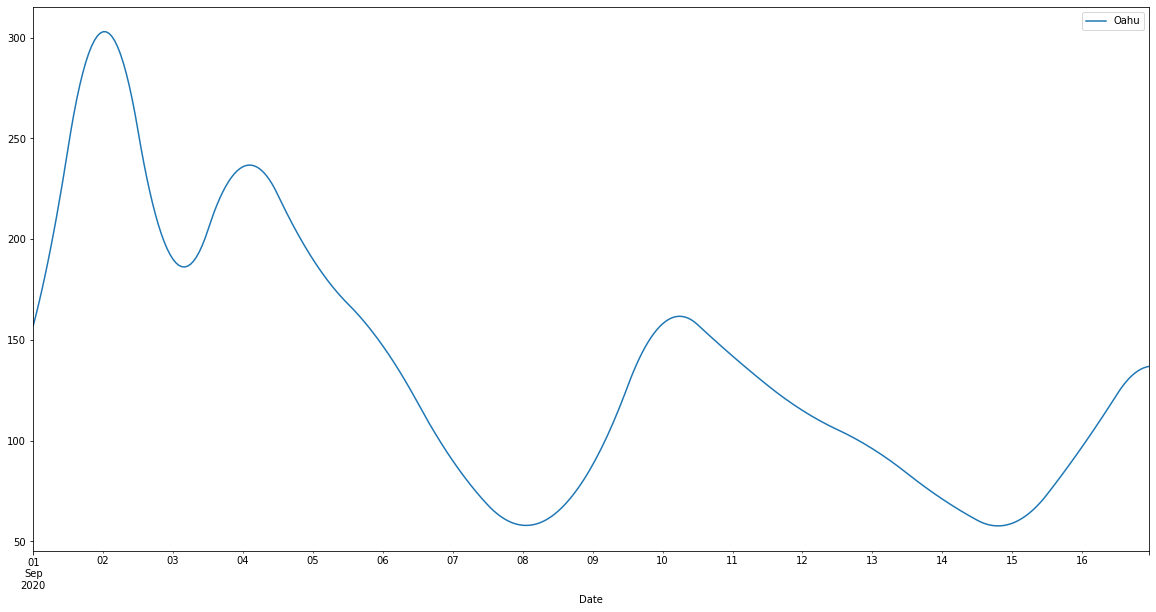

In [26]:
df_hr['2020-9-1':'2020-9-16'].plot(figsize=(20,10))

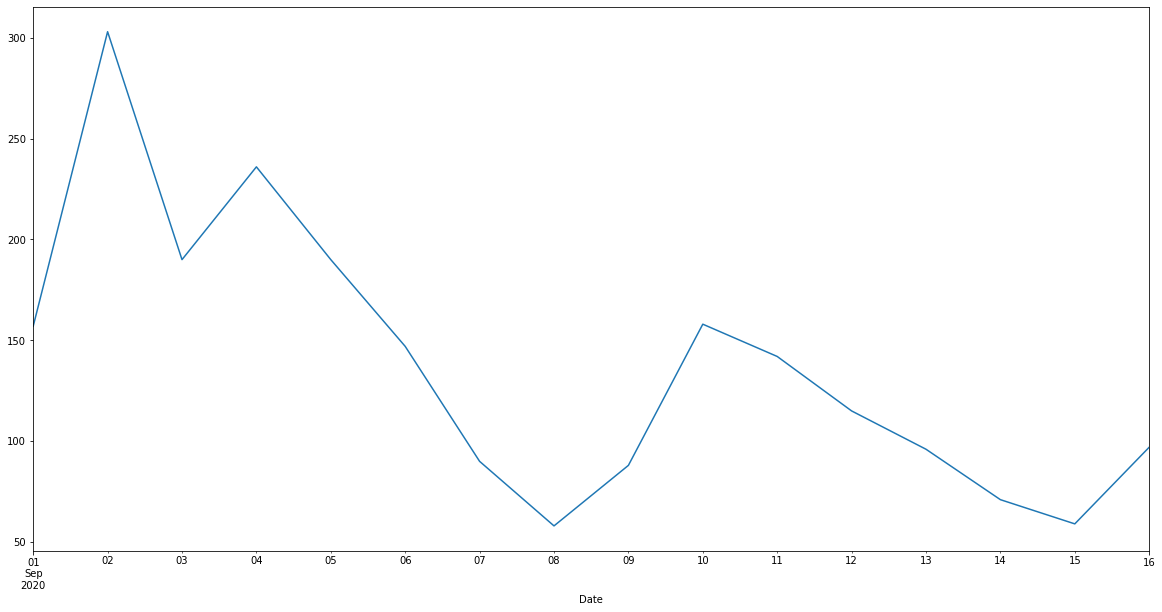

In [27]:
df_freq['2020-9-1':'2020-9-16']['Oahu'].plot(figsize=(20,10))

## regression line

In [42]:
#def regession line NB: polyfit can fit higher orders. Same technique could be used for np.interpolate
df_samp = df_hr['2020-9-12':'2020-10-12 00']
x = np.arange(df_samp.index.size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
fit = np.polyfit(x, df_samp['Oahu'], 1)
fit_fn = np.poly1d(fit)

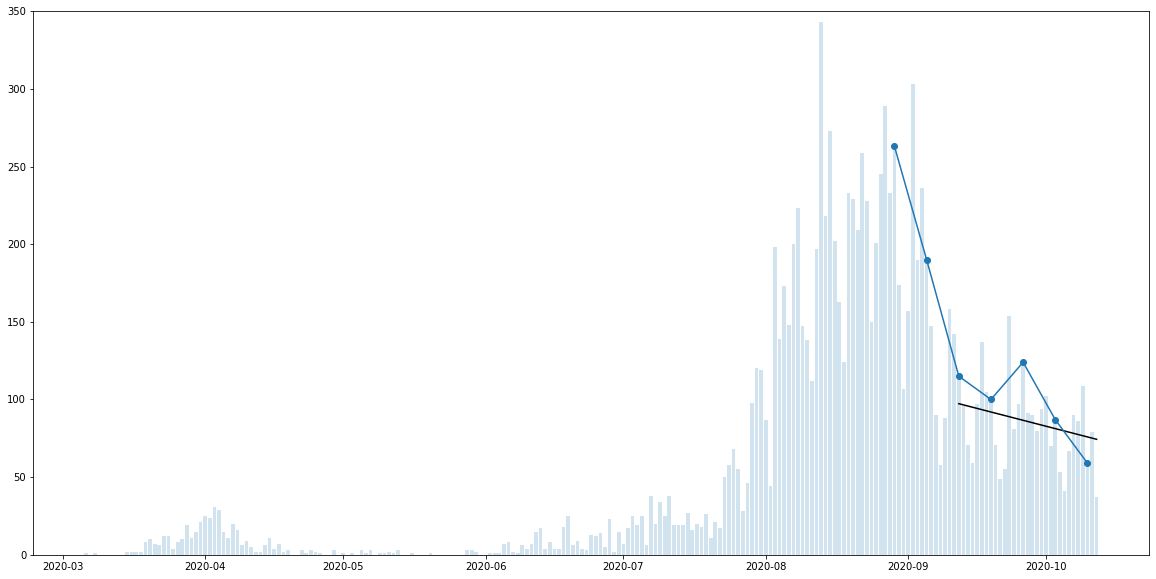

In [44]:
#run a line between two (atm the last two) Saturdays
xval = [pd.to_datetime('2020-8-29'),pd.to_datetime('2020-9-5'),pd.to_datetime('2020-9-12'),
        pd.to_datetime('2020-9-19'),pd.to_datetime('2020-9-26'),pd.to_datetime('2020-10-3'),
        pd.to_datetime('2020-10-10')]
yval = [df_hr.loc['2020-8-29 00']['Oahu'], df_hr.loc['2020-9-5 00']['Oahu'], df_hr.loc['2020-9-12 00']['Oahu'],
       df_hr.loc['2020-9-19 00']['Oahu'], df_hr.loc['2020-9-26 00']['Oahu'], df_hr.loc['2020-10-3 00']['Oahu'],
       df_hr.loc['2020-10-10 00']['Oahu']]

fig, ax = plt.subplots(figsize=(20,10))
plt.ylim(0,350)

#plot regression line
ax.plot(df_samp.index, fit_fn(x), 'k-')
#ax.plot(df_samp.index, df_samp['Oahu'], 'go', ms=2)

ax.bar(df_freq.index,df_freq['Oahu'],alpha=0.2)

ax.plot(xval,yval, marker='o');


In [30]:
df_samp.loc['2020-9-12 00']['Oahu']

115.0

In [31]:
dfOahu.describe()

,Oahu,weekly_mean,pct_diff,weekday
count,221.000000,215.000000,214.000000,221.000000
mean,54.855204,55.421262,0.970889,3.013575
std,75.487066,71.457643,0.753242,2.012415
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.785714,0.560528,1.000000
50%,17.000000,15.714286,0.907072,3.000000
75%,90.000000,93.000000,1.290270,5.000000
max,343.000000,229.857143,7.000000,6.000000


In [32]:
dfOahu['interp'] = np.nan
dfOahu.loc[(dfOahu.weekday == 5), 'interp'] = dfOahu.loc[(dfOahu.weekday == 5), 'Oahu']

/home/tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/tom/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
dfOahu['interp'].interpolate(method='slinear', inplace=True)
dfOahu['interp'].interpolate(method='slinear', fill_value='extrapolate', inplace=True)

/home/tom/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:7023: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


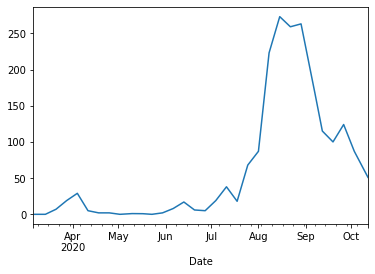

In [34]:
dfOahu['interp'].plot()

In [35]:
dfOahu['satPct'] = dfOahu['interp'] / dfOahu['Oahu']

/home/tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


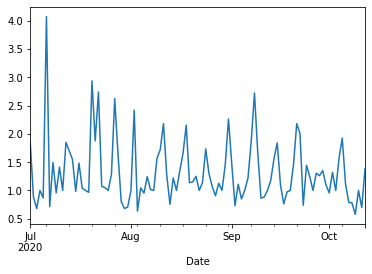

In [36]:
dfOahu['2020-7-1' : ]['satPct'].plot()

In [37]:
dfWeekDay = dfOahu['2020-8-15':].groupby('weekday').mean()
dfWeekDay.index =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

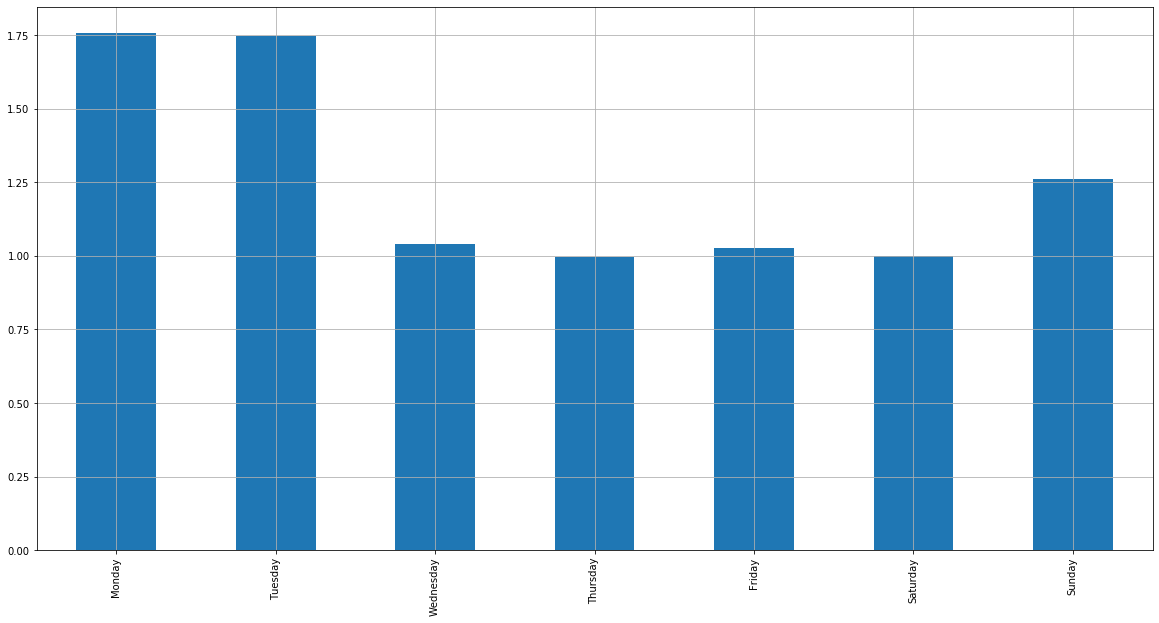

In [38]:
dfWeekDay['satPct'].plot(kind='bar',figsize=(20,10),grid='on')

In [39]:
dfWeekDay['satPct']

Monday       1.758474
Tuesday      1.745556
Wednesday    1.040616
Thursday     0.996359
Friday       1.027729
Saturday     1.000000
Sunday       1.261153
Name: satPct, dtype: float64

In [40]:
pct = 0.8
dfOahu.loc[(dfOahu.weekday == 0), 'munged'] = dfOahu.loc[(dfOahu.weekday == 0), 'Oahu'] * 1.816 * pct
dfOahu.loc[(dfOahu.weekday == 1), 'munged'] = dfOahu.loc[(dfOahu.weekday == 1), 'Oahu'] * 1.898 * pct
dfOahu.loc[(dfOahu.weekday == 2), 'munged'] = dfOahu.loc[(dfOahu.weekday == 2), 'Oahu'] * 1.141 * pct
dfOahu.loc[(dfOahu.weekday == 3), 'munged'] = dfOahu.loc[(dfOahu.weekday == 3), 'Oahu'] * 0.958 * pct
dfOahu.loc[(dfOahu.weekday == 4), 'munged'] = dfOahu.loc[(dfOahu.weekday == 4), 'Oahu'] * 1.016 * pct
dfOahu.loc[(dfOahu.weekday == 5), 'munged'] = dfOahu.loc[(dfOahu.weekday == 5), 'Oahu'] * pct
dfOahu.loc[(dfOahu.weekday == 6), 'munged'] = dfOahu.loc[(dfOahu.weekday == 6), 'Oahu'] * 1.265 * pct

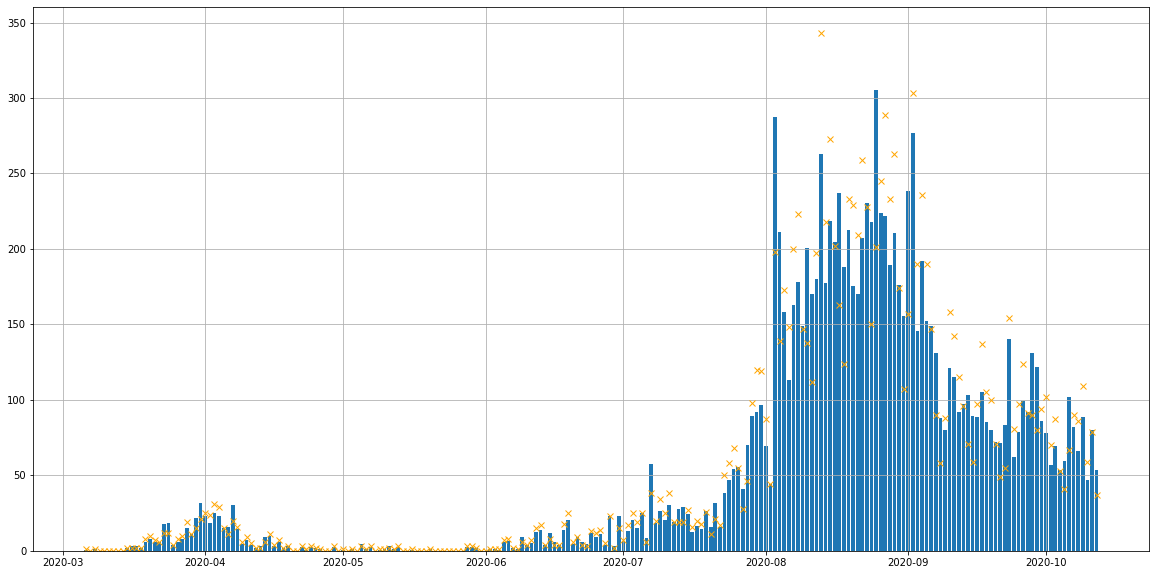

In [41]:
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(dfOahu.index,dfOahu['munged'],alpha=1)
ax.plot(dfOahu.index,dfOahu['Oahu'],alpha=1,linewidth=0.0,marker='x',color='orange')
#ax.plot(dfOahu.index,dfOahu['weekly_mean'])
#ax.plot(dfOahu.index,dfOahu['munged'].rolling(7,center=True).mean())

plt.grid()